In [1]:
import os
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from matplotlib import pyplot
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DOGS_DIR = os.listdir('/content/drive/MyDrive/dataset/catvsdog/Dog')
CATS_DIR = os.listdir('/content/drive/MyDrive/dataset/catvsdog/Cat')

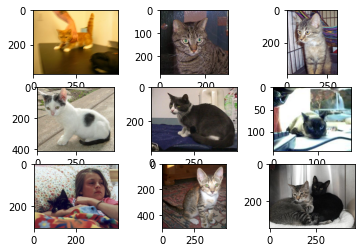

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/MyDrive/dataset/catvsdog/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Cat/' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [5]:
'''
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(folder, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)
'''

'\nnum_skipped = 0\nfor folder_name in ("Cat", "Dog"):\n    folder_path = os.path.join(folder, folder_name)\n    for fname in os.listdir(folder_path):\n        fpath = os.path.join(folder_path, fname)\n        try:\n            fobj = open(fpath, "rb")\n            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)\n        finally:\n            fobj.close()\n\n        if not is_jfif:\n            num_skipped += 1\n            # Delete corrupted image\n            os.remove(fpath)\n\nprint("Deleted %d images" % num_skipped)\n'

In [6]:
batch_size = 64  # max 1000 of these images can fit in gpu memory
new_img_size = (200,200)
input_shape = (200,200,3)
data_split = 0.2 #0.0005
seed_value = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    folder,
    validation_split=data_split,
    subset="training",
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    folder,
    validation_split=data_split,
    subset="validation",
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)

Found 23439 files belonging to 2 classes.
Using 18752 files for training.
Found 23439 files belonging to 2 classes.
Using 4687 files for validation.


In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape= input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='softmax'))

In [13]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

Epoch 1/5
 88/293 [========>.....................] - ETA: 45:03 - loss: 0.8831 - acc: 0.4924

KeyboardInterrupt: ignored

In [ ]:
# evaluate the keras model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)